# Sampling Basics 

In [25]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from scipy import signal
from scipy.fftpack import fft, ifft, fftfreq, fftshift


Running Python: 3.12.6
Running Sympy: 1.13.2


In [32]:
# Function to plot the aliasing effect in the frequency domain
def alias_plot(data):
    f0,f0_alias, t, ts, x, x0, x0_alias = data
    Ts = ts[1] - ts[0]  # Sampling interval
    fs = 1 / Ts  # Sampling frequency
    freq = fftfreq(len(t), t[1] - t[0])  # Frequency bins for continuous signal
    freq_s = fftfreq(len(ts), Ts)  # Frequency bins for sampled signal

    X = fft(x)  # FFT of continuous signal
    X0 = fft(x0)  # FFT of sampled signal
    X0_alias = fft(x0_alias)  # FFT of aliased signal
    
    II_X = np.argmax(X)  # Index of max frequency component in continuous signal
    II_X0 = np.argmax(X0)  # Index of max frequency component in sampled signal
    II_X0_alias = np.argmax(X0_alias)  # Index of max frequency component in aliased signal
    
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axvline(x=freq[II_X], color="r", lw=6, label="$f_0=$" + str(f0))  # Original frequency
    ax.axvline(x=-freq[II_X], color="r", lw=6)
    ax.axvline(x=freq[II_X0_alias], color="b", lw=4, ls="dashed", label="$\hat f_0=$" + str(np.round(f0_alias, 3)))  # Aliased frequency
    ax.axvline(x=-freq[II_X0_alias], color="b", lw=4, ls="dashed")
    ax.axvline(x=freq_s[II_X0], color="g", label="sampled")  # Sampled frequency
    ax.axvline(x=-freq_s[II_X0], color="g")
    ax.axvline(x=fs / 2, color="k", ls="dashed", ymax=0.75)  # Nyquist frequency
    ax.axvline(x=-fs / 2, color="k", ls="dashed", ymax=0.75)
    ax.axvline(x=fs, color="k", ymax=0.75)  # Sampling frequency
    ax.axvline(x=-fs, color="k", ymax=0.75)
    ax.axvline(x=2 * fs, color="k", ymax=0.75)  # Twice the sampling frequency
    ax.axvline(x=-2 * fs, color="k", ymax=0.75)
    ax.set_xlim([-1.5, 1.5])
    ax.set_xticks([-2 * fs, -fs, -fs / 2, fs / 2, fs, 2 * fs], ["$-2f_s$", "$-f_s$", "$-f_s/2$", "$f_s/2$", "$f_s$", "$2f_s$"])
 
    rect = plt.Rectangle((-fs / 2, 0), fs, 1, alpha=0.4, color="grey")
    ax.add_patch(rect)

    ax.legend()
    plt.title("Alias mapping with $f_s=$" + str(fs))
    plt.show()

# Function to plot the time domain representation of the signals
def time_plot(data, filename, Tf=10):
    f0,f0_alias, t, ts, x, x0, x0_alias = data
    Ts = ts[1] - ts[0]  # Sampling interval
    fs = 1 / Ts  # Sampling frequency
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(t, x, 'k--', lw=1, label='cts signal')  # Continuous signal
    ax.plot(ts, x0, 'ro', label='samples')  # Sampled signal
    ax.plot(t, x0_alias, 'b:', lw=2, label='aliased signal')  # Aliased signal
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, Tf - 1)
    ax.set_xlabel('time', fontsize=18)
    ax.set_ylabel('amplitude', fontsize=18)
    plt.title('Sampled Data')
    if f0_alias >= 0: 
        plt.title('$f=$' + str(f0) + 'Hz and $\hat f=$' + str(np.round(f0_alias, 3)) + 'Hz', loc='left', color='k')
    else:
        plt.title('$f=$' + str(f0) + 'Hz and $\hat f=$' + str(np.round(f0_alias, 3)) + 'Hz', loc='left', color='r')
    plt.legend(loc=1)
    fig.savefig(filename, dpi=300)
    plt.show()

# Function to set up the aliasing example
def alias_setup(Tf=10, Ts=1, f0=3/8):
    dt_small = 1e-3 # Small time step 
    fs = 1 / Ts  # Sampling frequency
    t = np.arange(0, Tf, dt_small)  # Continuous time vector
    ts = np.arange(0, Tf, Ts)  # Sampled time vector

    w0 = 2 * np.pi * f0  # Angular frequency
    x = np.sin(w0 * t)  # Continuous signal
    x0 = np.sin(w0 * ts)  # Sampled signal
    f0_alias = f0 - fs * np.round(f0 / fs, 0)  # Aliased frequency
    x0_alias = np.sin(2 * np.pi * f0_alias * t)  # Aliased signal
    return f0,f0_alias, t, ts, x, x0, x0_alias

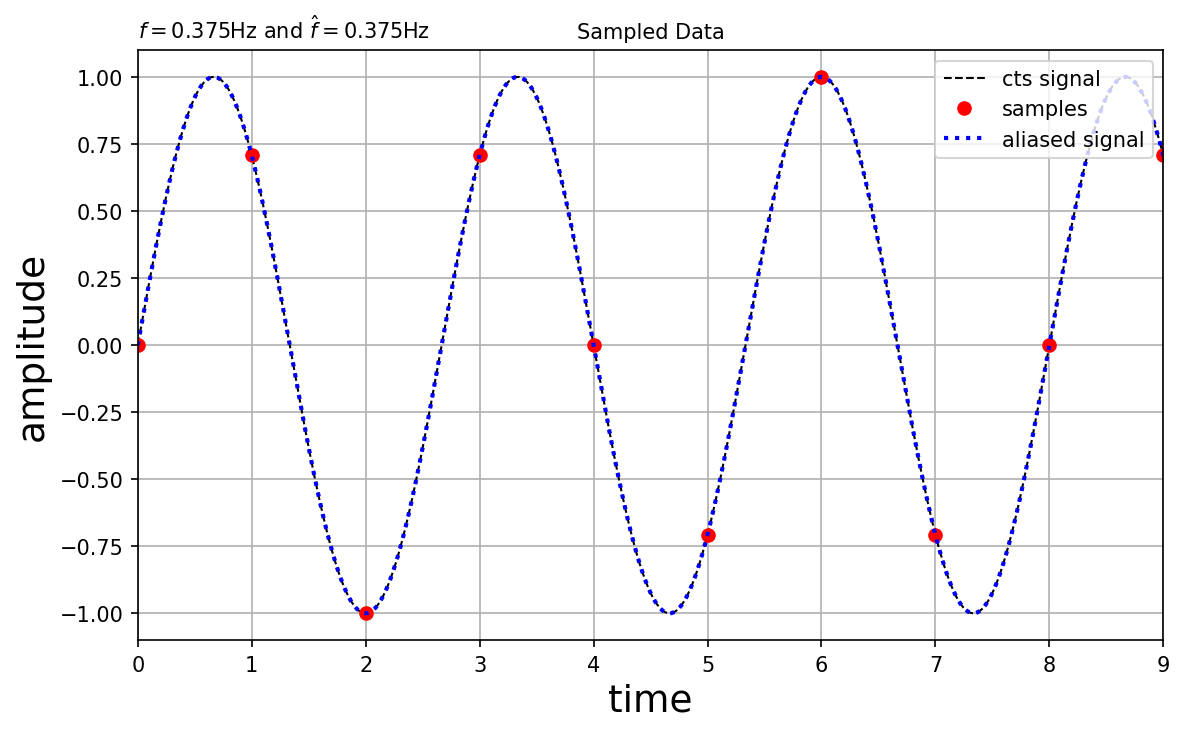

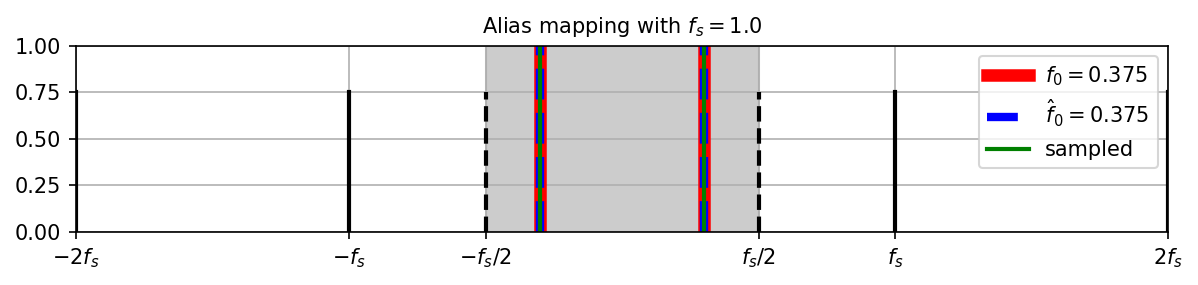

In [33]:
Ts = 1
f0 = 3/8
data = alias_setup(Ts=Ts,f0=f0)
time_plot(data,"./figs/T9_ex1.png")
alias_plot(data)

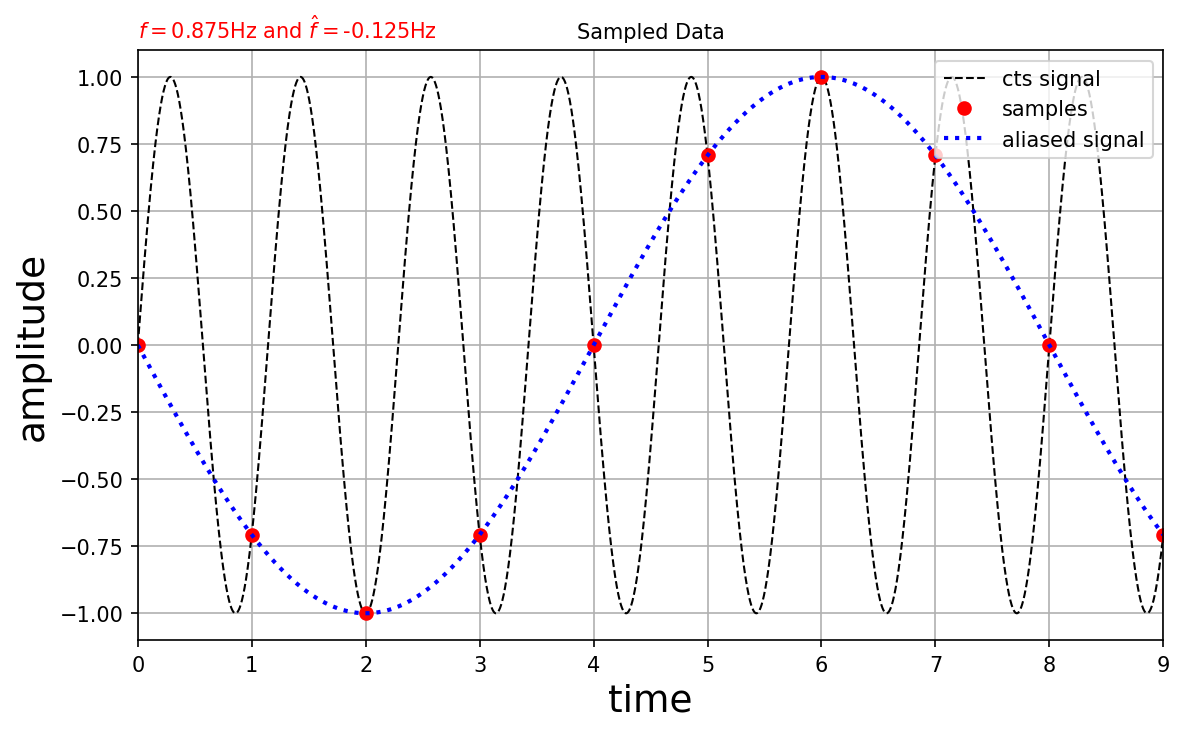

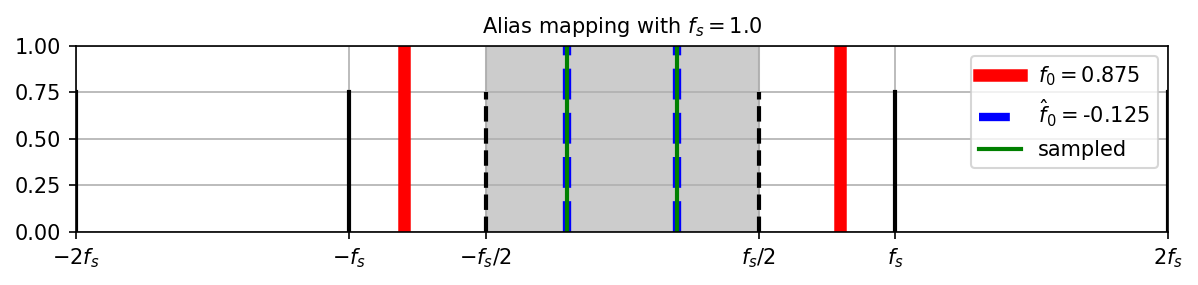

In [34]:
Ts = 1
f0 = 7/8
data = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(data,"./figs/T9_ex2.png")
alias_plot(data)

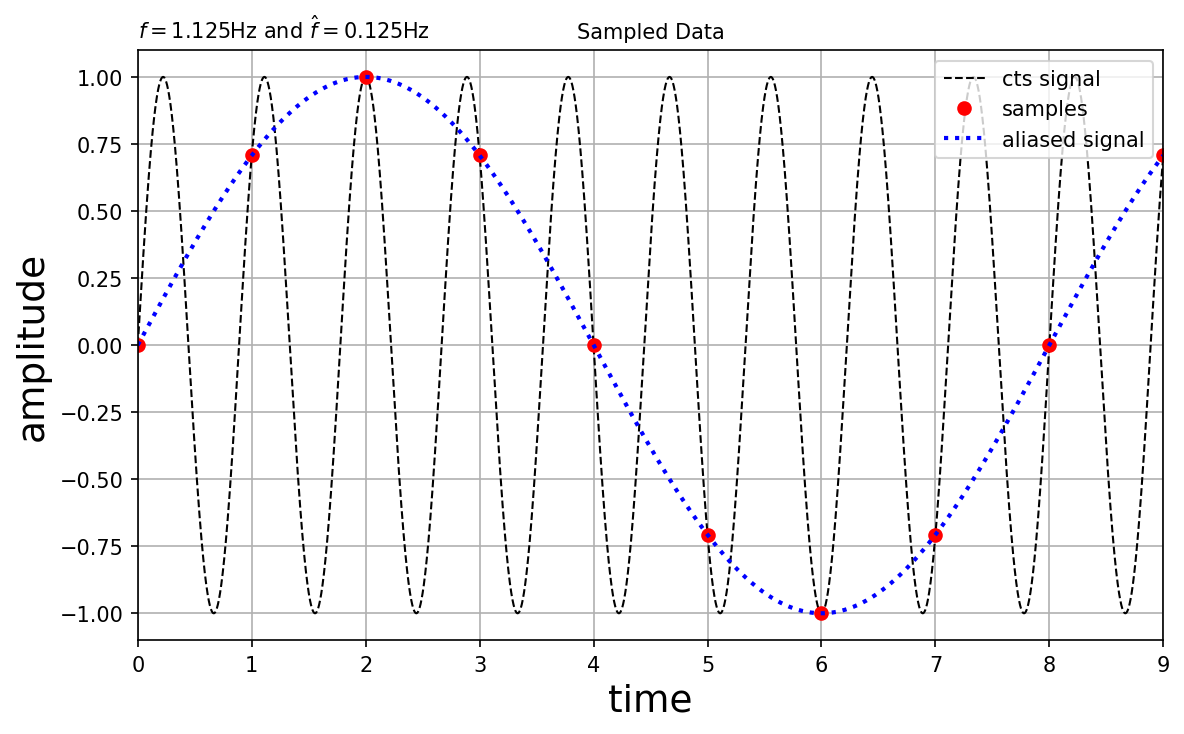

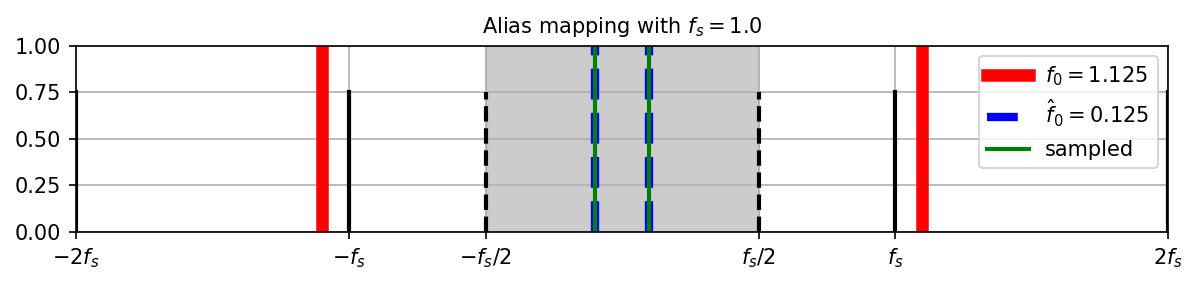

In [35]:
Ts = 1
f0 = 9/8
data = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(data,"./figs/T9_ex3.png")
alias_plot(data)

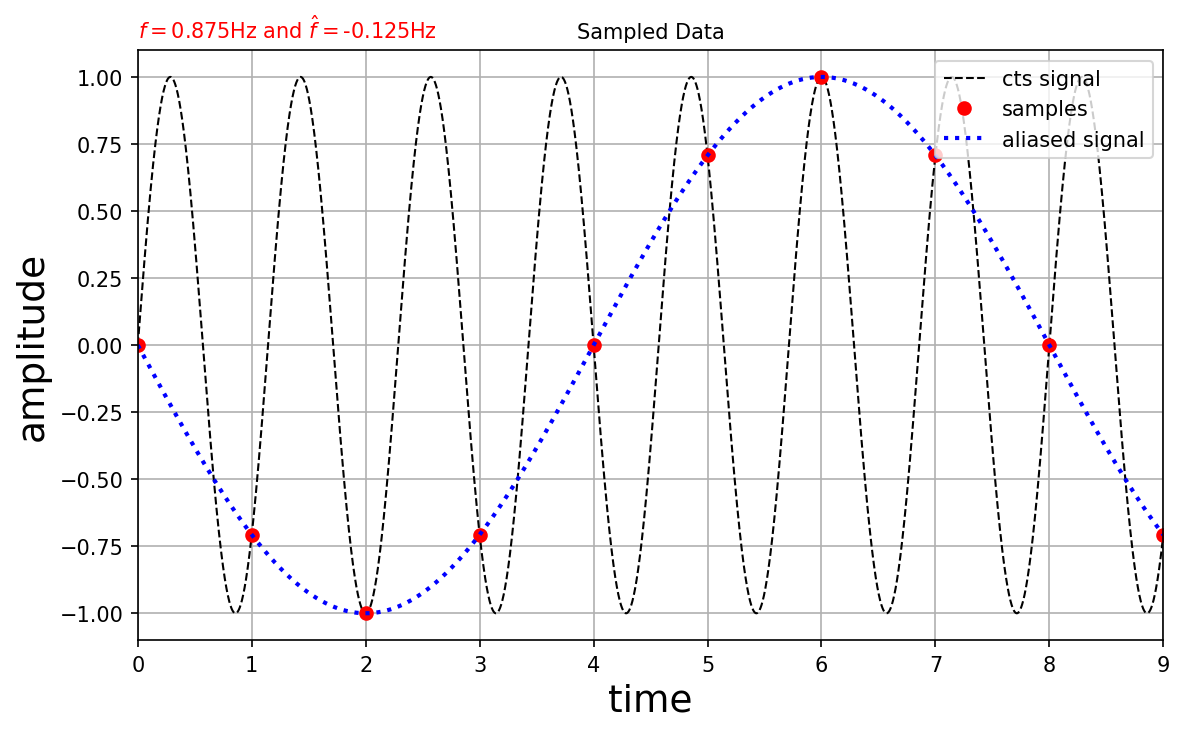

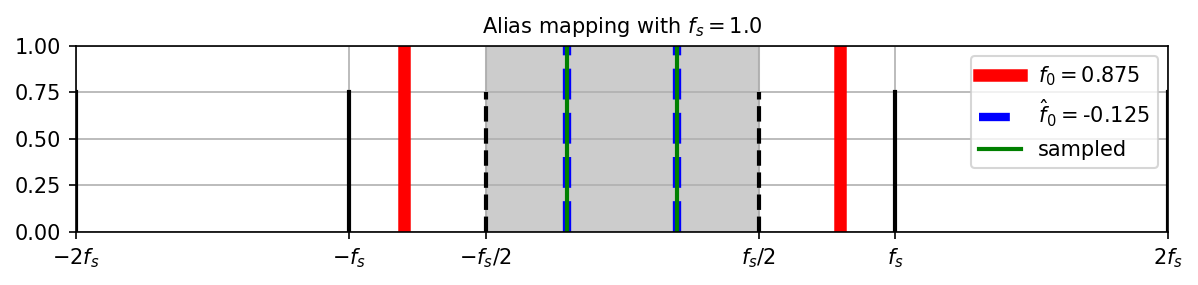

In [30]:
Ts = 1
f0 = 7/8
t,ts,x,x0,x0_alias,f0_alias = alias_setup(Tf=10,Ts=Ts,f0=f0)
time_plot(f0,f0_alias,t,ts,x,x0,x0_alias,"./figs/T9_ex4.png")
alias_plot(t,ts,x,x0,x0_alias)

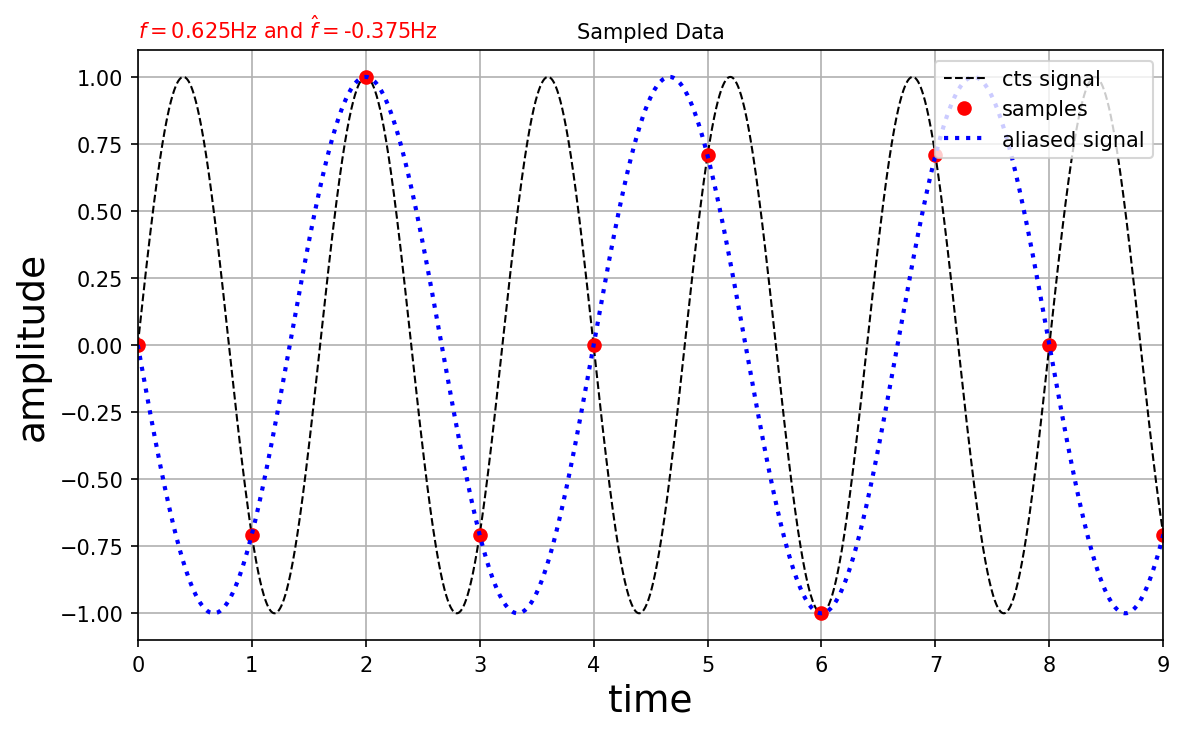

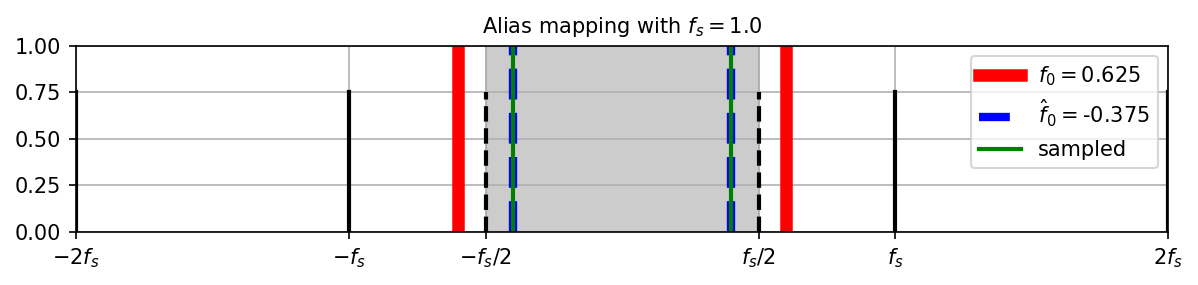

In [36]:
# Define parameters for the sine function
Ts = 1
f0 = 5/8  # Change this value to see different aliasing effects

# Generate the aliasing setup
data = alias_setup(Tf=10, Ts=Ts, f0=f0)

# Plot the time domain representation
time_plot(data, "./figs/T9_ex_aliasing.png")

# Plot the frequency domain representation
alias_plot(data)